In [1]:
!python --version
!sudo apt-get install python3.7
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!python --version

Python 3.10.12
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support
  python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support python3.7
  python3.7-minimal
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,698 kB of archives.
After this operation, 17.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.7-minimal amd64 3.7.17-1+jammy1 [608 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 p

Mouted drive to save and retrive file

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


REQUIRED LIBRARIES


In [3]:
import re
import spacy
import numpy as np
import pandas as pd
import seaborn as sns

import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import  precision_score, recall_score

reading csv

In [4]:
temp=pd.read_csv('/content/gdrive/MyDrive/depression_analysis-ml_project/data/tweets_combined.csv')
df = temp.drop(columns=["Unnamed: 0"])

In [5]:
len(df)

9539

In [6]:
df.shape

(9539, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9539 entries, 0 to 9538
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   9539 non-null   object
 1   target  9539 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


checking type

In [8]:
df.dtypes

,0
tweet,object
target,int64


Here, 1 represents a depress tweet while 0 represents a non-depress tweet.

In [9]:
df['target'].unique()

array([1, 0])

In [10]:
df['target'].value_counts(normalize = True)

,proportion
target,
1,0.881434
0,0.118566


<Axes: xlabel='target'>

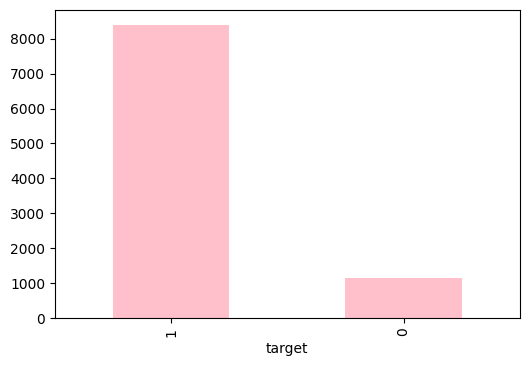

In [11]:
df['target'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

#Pre-proccesing

In [12]:
# Expand Contraction
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)




In [13]:
#remove emoji
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', text)

#remove url
def remove_URL(sample):

    return re.sub(r"http\S+", "", sample)

def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
            #remove hashtag, @mention, emoji and image URLs
        tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())

            #expand contraction
        tweet = expandContractions(tweet)

        tweet = remove_URL(tweet)

        tweet = deEmojify(tweet)


        cleaned_tweets.append(tweet)

    return cleaned_tweets



In [14]:
df['clean_tweet']=clean_tweets(df['tweet'])

In [15]:
df['clean_tweet'].replace('', np.nan, inplace=True, limit=(len(df)))

<ipython-input-15-d0787c93cb13>:1: FutureWarning: The 'limit' keyword in Series.replace is deprecated and will be removed in a future version.
  df['clean_tweet'].replace('', np.nan, inplace=True, limit=(len(df)))
<ipython-input-15-d0787c93cb13>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_tweet'].replace('', np.nan, inplace=True, limit=(len(df)))


In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(9538, 3)

In [18]:
df.head(10)

,tweet,target,clean_tweet
0,"Was planning to head up to Scotland this week,...",1,"Was planning to head up to Scotland this week,..."
1,@LemonieSays same!!! I can't wait to focus sol...,1,same!!! I cannot wait to focus soley on teachi...
2,i farmed for 160 primos and got another bennet...,1,i farmed for 160 primos and got another bennet...
3,@TianaTait I meant to let's have a walk and ki...,1,I meant to let us have a walk and kill the hea...
4,@Benmorris04 happy birthday big man 👀😂⚽️,0,happy birthday big man
5,If you've tried antidepressants and they have ...,1,If you have tried antidepressants and they hav...
6,@mycharlibrown @pcbcat43 Happy birthday Mom wh...,0,Happy birthday Mom what a wonderful cake deliv...
7,It’s so hard to be honest about how you feel w...,1,It’s so hard to be honest about how you feel w...
8,"@AdekolaAkani You've moved on, no need to stre...",1,"You've moved on, no need to stress yourself ab..."
9,@JucikaDaily That was a stress egg. Those are ...,1,That was a stress egg. Those are no good.


convert text to lowercase

In [19]:
df['clean_tweet']= df['clean_tweet'].str.lower()

Remove numbers

In [20]:
df['clean_tweet']= df['clean_tweet'].str.replace("[0-9]"," ")

remove whitespaces

In [21]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:' '.join(x.split()))

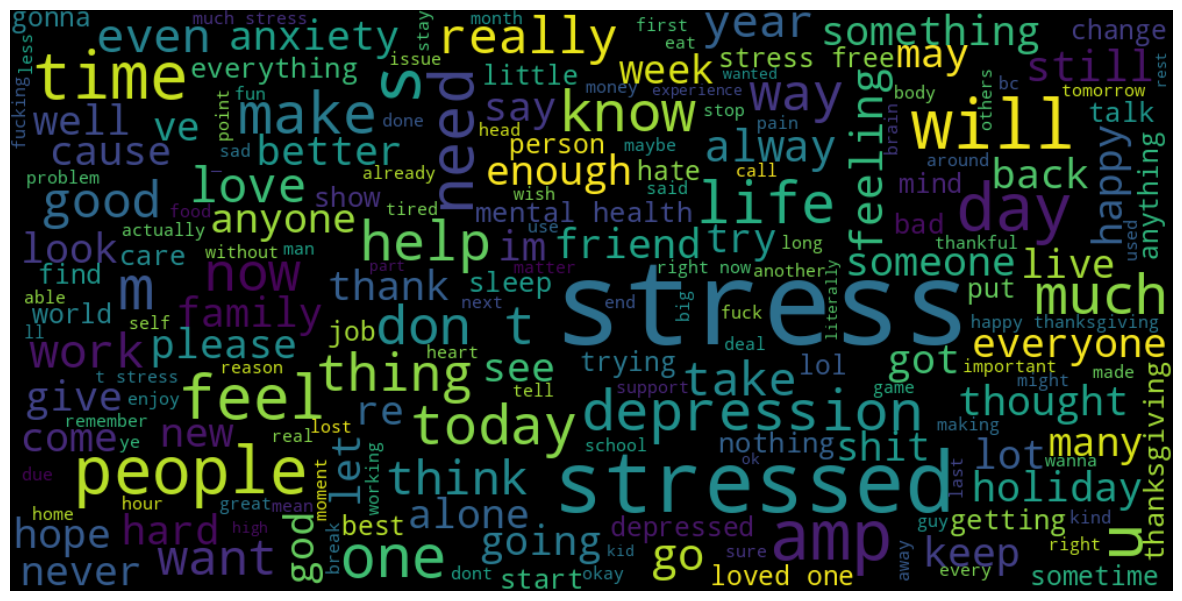

In [22]:
words  =  " ".join([sentence for sentence in df['clean_tweet'][df['target']==1]])

wordcloud = WordCloud(width =1000, height = 500, random_state=50 ,max_font_size =100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

It's easy to spot words that are indicative of depression in these tweets: depression, help, crying, stress, therapy, mental health, emotional, bipolar.

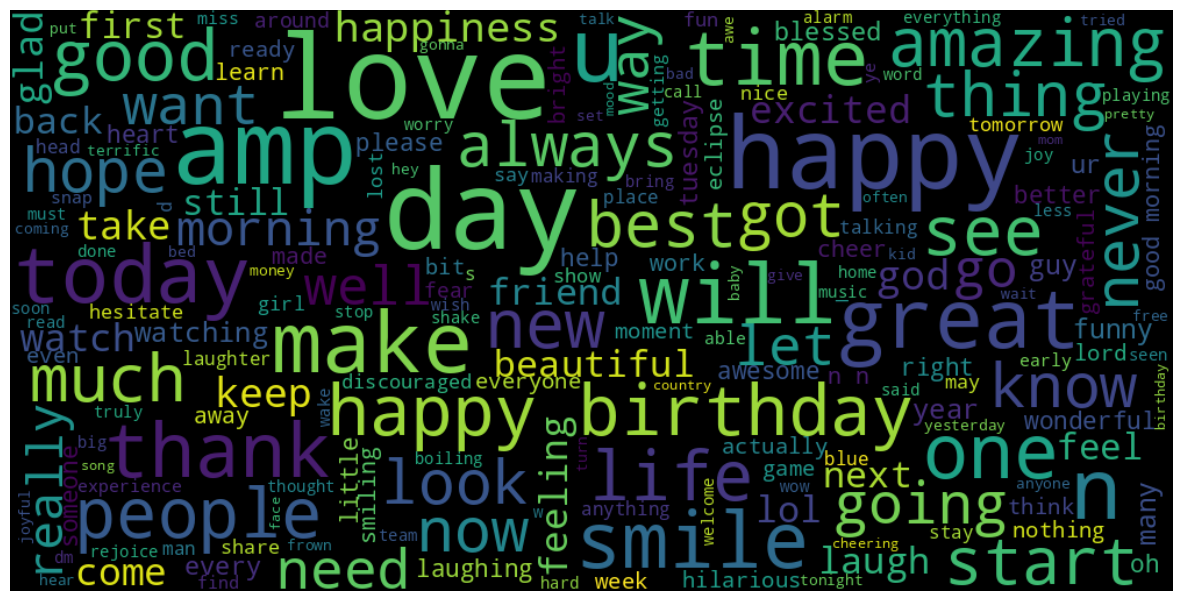

In [23]:
words  =  " ".join([sentence for sentence in df['clean_tweet'][df['target']==0]])

wordcloud = WordCloud(width =1000, height = 500, random_state=42 ,max_font_size =100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

comparing clean and non-clean tweet

In [24]:
df['clean_tweet'].head(10)

,clean_tweet
0,"was planning to head up to scotland this week,..."
1,same!!! i cannot wait to focus soley on teachi...
2,i farmed for 160 primos and got another bennet...
3,i meant to let us have a walk and kill the hea...
4,happy birthday big man
5,if you have tried antidepressants and they hav...
6,happy birthday mom what a wonderful cake deliv...
7,it’s so hard to be honest about how you feel w...
8,"you've moved on, no need to stress yourself ab..."
9,that was a stress egg. those are no good.


#ELMo

In [25]:
!sudo apt install python3-pip
!python -m pip install --upgrade pip setuptools
!pip3 install tensorflow==1.15
!pip3 install "tensorflow_hub==0.6.0"
!pip3 install tensorflow_text==1.15

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,968 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.2 [340 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.5 [1,306 kB]
Fetched 1,677 kB in 2s (1,075 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog

In [26]:
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.load("https://tfhub.dev/google/elmo/2")

ELMo

In [27]:
def elmo_vectors(x):
    # Generate ELMo embeddings
    embeddings = elmo.signatures["default"](tf.constant(x))["elmo"]
    # Return average of ELMo features
    return tf.reduce_mean(embeddings, axis=1).numpy()

batch of 100

In [28]:
list_tweet = [df[i:i+100] for i in range(0,df.shape[0],100)]

In [29]:
elmo_tweet = [elmo_vectors(x['clean_tweet'].tolist()) for x in list_tweet]

In [30]:
elmo_tweet_new = np.concatenate(elmo_tweet, axis = 0)

saving ELMo result in pickle

In [31]:
import pickle
pickle_out = open("/content/gdrive/MyDrive/depression_analysis-ml_project/data/elmo_tweet.pickle","wb")
pickle.dump(elmo_tweet_new, pickle_out)
pickle_out.close()

In [32]:
import pickle
pickle_in = open("/content/gdrive/MyDrive/depression_analysis-ml_project/data/elmo_tweet.pickle", "rb")
elmo_tweet_new = pickle.load(pickle_in)

#ML Models

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train , y_test= train_test_split(elmo_tweet_new,df['target'], random_state=42 , test_size=.2)

LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=2000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [35]:
y_pred1=LR.predict(x_test)

In [36]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.32      0.45       247
           1       0.91      0.98      0.94      1661

    accuracy                           0.90      1908
   macro avg       0.83      0.65      0.70      1908
weighted avg       0.89      0.90      0.88      1908



Linear SVC

In [37]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [38]:
y_pred2 = SVCmodel.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54       247
           1       0.92      0.96      0.94      1661

    accuracy                           0.90      1908
   macro avg       0.79      0.71      0.74      1908
weighted avg       0.89      0.90      0.89      1908



Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred3 =  RFC.predict(x_test)

In [42]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.15      0.25       247
           1       0.89      1.00      0.94      1661

    accuracy                           0.89      1908
   macro avg       0.93      0.57      0.60      1908
weighted avg       0.90      0.89      0.85      1908



KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
KNc = KNeighborsClassifier(n_neighbors=3)
KNc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_pred4= KNc.predict(x_test)

In [45]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.56      0.34      0.42       247
           1       0.91      0.96      0.93      1661

    accuracy                           0.88      1908
   macro avg       0.73      0.65      0.68      1908
weighted avg       0.86      0.88      0.87      1908



Bert Transformer

In [46]:
from sklearn.tree import DecisionTreeClassifier
decisionTree=DecisionTreeClassifier(max_depth=5, random_state=42)
decisionTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [47]:
y_pred5= decisionTree.predict(x_test)

In [48]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.39      0.28      0.32       247
           1       0.90      0.94      0.92      1661

    accuracy                           0.85      1908
   macro avg       0.64      0.61      0.62      1908
weighted avg       0.83      0.85      0.84      1908



custom text predict

In [49]:
def elmo_vectors_word(x):
    # Use the default signature of the ELMo model to get embeddings
    embeddings = elmo.signatures["default"](tf.constant(x))["elmo"]
    # Return the average of ELMo features
    return tf.reduce_mean(embeddings, axis=1).numpy()

In [50]:
# Test the function
x = ["today is a wonderful day"]
l = elmo_vectors_word(x)

In [51]:
print(l)

[[-0.1478663   0.18926774  0.02463076 ...  0.00907235  0.24567275
   0.33142397]]


In [52]:
b = SVCmodel.predict(l)
print(b)

[0]


In [53]:
b = RFC.predict(l)
print(b)

[1]


In [54]:
b = LR.predict(l)
print(b)

[0]


In [55]:
b = KNc.predict(l)
print(b)

[1]


In [56]:
accuracies = []
f1_scores = []
precisions = []
recalls = []

models_name = ['Logistic Regression', 'SVC', 'RFC','KNN','Decision Tree']
y_preds = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]


for idx, (name, pred) in enumerate(zip(models_name, y_preds)):
  accuracies.append(accuracy_score(y_test, pred))
  f1_scores.append(f1_score(y_test, pred))
  precisions.append(precision_score(y_test, pred))
  recalls.append(recall_score(y_test, pred))

In [57]:
compare_df = pd.DataFrame.from_dict({
    'name': models_name,
    'accuracy': accuracies,
    'f1_score': f1_scores,
    'precision': precisions,
    'recall': recalls
})

compare_df

,name,accuracy,f1_score,precision,recall
0,Logistic Regression,0.898847,0.944268,0.907325,0.984347
1,SVC,0.898847,0.943118,0.923788,0.963275
2,RFC,0.888889,0.939977,0.887226,0.999398
3,KNN,0.879455,0.932749,0.906765,0.960265
4,Decision Tree,0.850105,0.915734,0.896711,0.935581


<ipython-input-58-f7f1840a5abc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[]

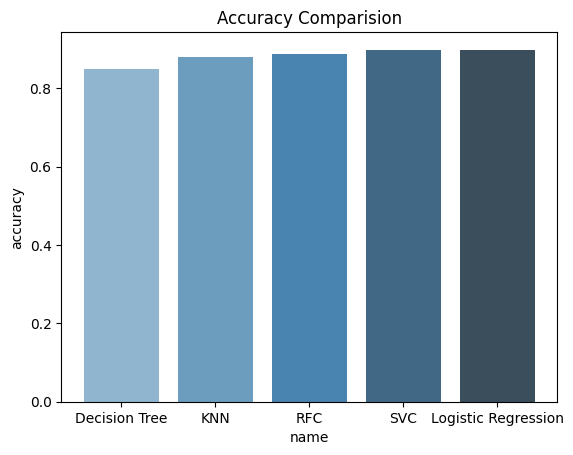

In [58]:
sns.barplot(
    x='name',
    y='accuracy',
    data=compare_df,
    palette='Blues_d',
    order=compare_df.sort_values('accuracy').name
)
plt.title('Accuracy Comparision')
plt.plot()

<ipython-input-59-530f0ee39e50>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[]

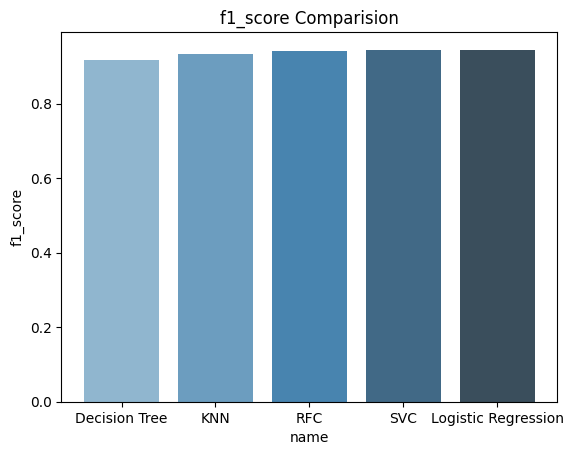

In [59]:
sns.barplot(
    x='name',
    y='f1_score',
    data=compare_df,
    palette='Blues_d',
    order=compare_df.sort_values('f1_score').name
)
plt.title('f1_score Comparision')
plt.plot()

<ipython-input-60-22b7b92896bb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[]

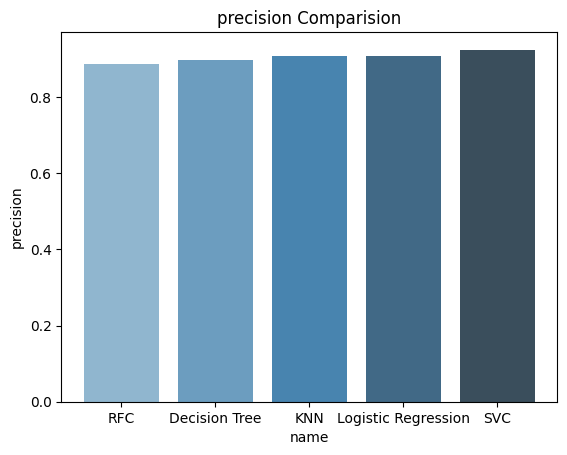

In [60]:
sns.barplot(
    x='name',
    y='precision',
    data=compare_df,
    palette='Blues_d',
    order=compare_df.sort_values('precision').name
)
plt.title('precision Comparision')
plt.plot()

<ipython-input-61-f9370c33859a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[]

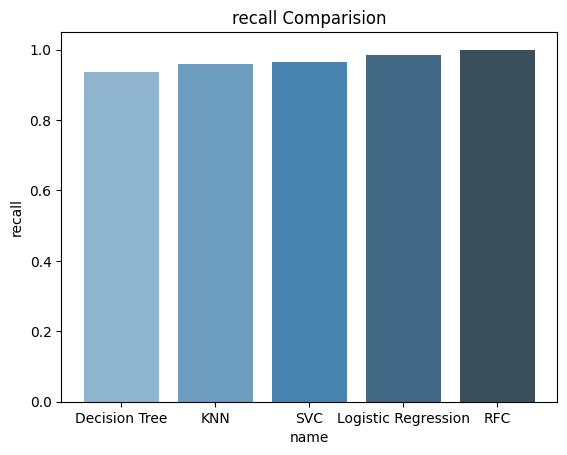

In [61]:
sns.barplot(
    x='name',
    y='recall',
    data=compare_df,
    palette='Blues_d',
    order=compare_df.sort_values('recall').name
)
plt.title('recall Comparision')
plt.plot()

#BoW

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow = bow_vectorizer.fit_transform(df['clean_tweet'])
bow.shape

(9538, 7135)

#ML model

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train , y_test= train_test_split(bow,df['target'], random_state=42 , test_size=.02)

LogisticRegression


In [64]:
from sklearn.linear_model import LogisticRegression
LR_BoW = LogisticRegression(max_iter=2000)
LR_BoW.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [65]:
y_pred_1=LR_BoW.predict(x_test)

In [66]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.58      0.37      0.45        19
           1       0.93      0.97      0.95       172

    accuracy                           0.91       191
   macro avg       0.76      0.67      0.70       191
weighted avg       0.90      0.91      0.90       191



linear SVC

In [67]:
SVCmodel_boW = LinearSVC()
SVCmodel_boW.fit(x_train, y_train)

LinearSVC()

In [68]:
y_pred_2 = SVCmodel_boW.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred_2)

0.9162303664921466

In [70]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        19
           1       0.95      0.96      0.95       172

    accuracy                           0.92       191
   macro avg       0.77      0.74      0.75       191
weighted avg       0.91      0.92      0.91       191



Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
RFC_bow = RandomForestClassifier()
RFC_bow.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
y_pred_3 =  RFC_bow.predict(x_test)

In [73]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.37      0.50        19
           1       0.93      0.99      0.96       172

    accuracy                           0.93       191
   macro avg       0.86      0.68      0.73       191
weighted avg       0.92      0.93      0.91       191



KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
KNc_BoW = KNeighborsClassifier(n_neighbors=3)
KNc_BoW.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
y_pred_4= KNc_BoW.predict(x_test)

In [76]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.27      0.32      0.29        19
           1       0.92      0.91      0.91       172

    accuracy                           0.85       191
   macro avg       0.60      0.61      0.60       191
weighted avg       0.86      0.85      0.85       191



In [77]:
from sklearn.tree import DecisionTreeClassifier
decisionTree_BoW=DecisionTreeClassifier(max_depth=5, random_state=42)
decisionTree_BoW.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [78]:
y_pred_5= decisionTree_BoW.predict(x_test)

In [79]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.33      0.05      0.09        19
           1       0.90      0.99      0.94       172

    accuracy                           0.90       191
   macro avg       0.62      0.52      0.52       191
weighted avg       0.85      0.90      0.86       191



In [80]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [81]:
accuracies = []
f1_scores = []
precisions = []
recalls = []

models_name = ['Logistic Regression', 'SVC','RFC','KNC','Decision Tree']
y_preds = [y_pred_1, y_pred_2, y_pred_3,y_pred_4,y_pred_5]


for idx, (name, pred) in enumerate(zip(models_name, y_preds)):
  accuracies.append(accuracy_score(y_test, pred))
  f1_scores.append(f1_score(y_test, pred))
  precisions.append(precision_score(y_test, pred))
  recalls.append(recall_score(y_test, pred))


compare_df = pd.DataFrame.from_dict({
    'name': models_name,
    'accuracy': accuracies,
    'f1_score': f1_scores,
    'precision': precisions,
    'recall': recalls
})
compare_df

,name,accuracy,f1_score,precision,recall
0,Logistic Regression,0.910995,0.951567,0.932961,0.970930
1,SVC,0.916230,0.953757,0.948276,0.959302
2,RFC,0.926702,0.960452,0.934066,0.988372
3,KNC,0.848168,0.914956,0.923077,0.906977
4,Decision Tree,0.895288,0.944444,0.904255,0.988372


<ipython-input-82-f7f1840a5abc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[]

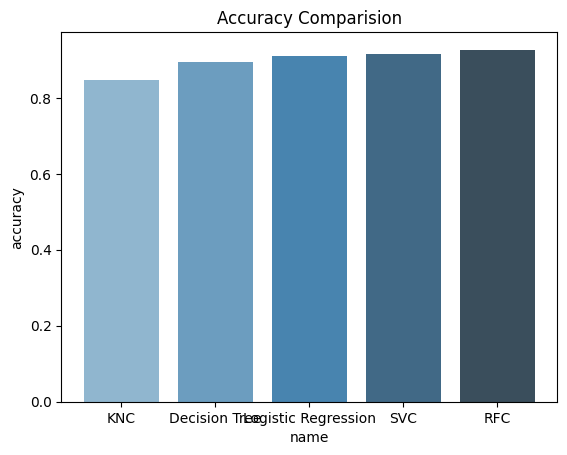

In [82]:
sns.barplot(
    x='name',
    y='accuracy',
    data=compare_df,
    palette='Blues_d',
    order=compare_df.sort_values('accuracy').name
)
plt.title('Accuracy Comparision')
plt.plot()

<ipython-input-83-530f0ee39e50>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[]

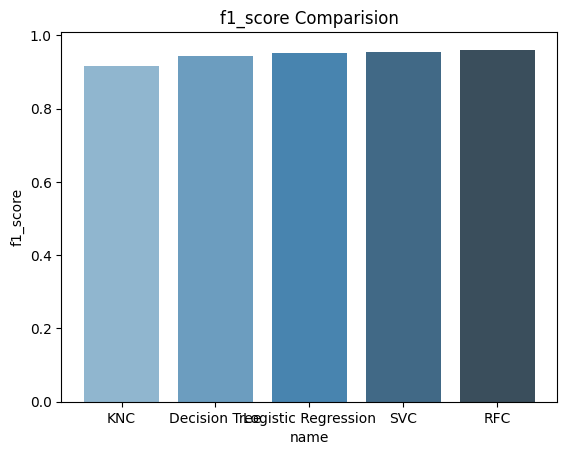

In [83]:
sns.barplot(
    x='name',
    y='f1_score',
    data=compare_df,
    palette='Blues_d',
    order=compare_df.sort_values('f1_score').name
)
plt.title('f1_score Comparision')
plt.plot()

<ipython-input-84-22b7b92896bb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[]

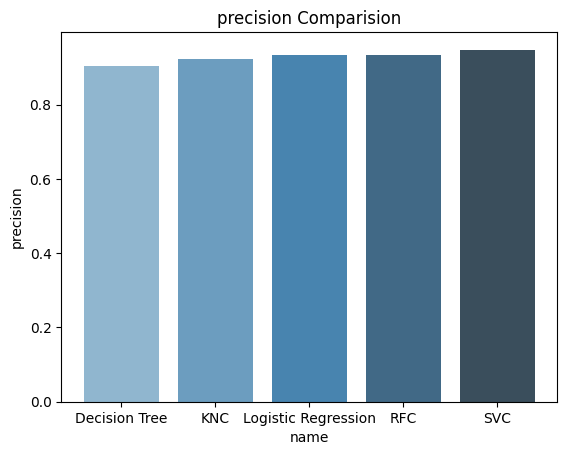

In [84]:
sns.barplot(
    x='name',
    y='precision',
    data=compare_df,
    palette='Blues_d',
    order=compare_df.sort_values('precision').name
)
plt.title('precision Comparision')
plt.plot()

<ipython-input-85-f9370c33859a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[]

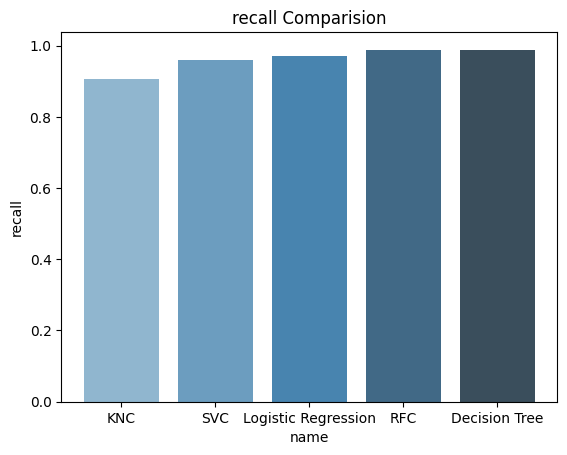

In [85]:
sns.barplot(
    x='name',
    y='recall',
    data=compare_df,
    palette='Blues_d',
    order=compare_df.sort_values('recall').name
)
plt.title('recall Comparision')
plt.plot()